In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv(r'E:\Self study\Data\auto-mpg.csv' )
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [4]:
data['mpg'].describe()

count    398.000000
mean      23.514573
std        7.815984
min        9.000000
25%       17.500000
50%       23.000000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

C:\Users\Ghazy\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


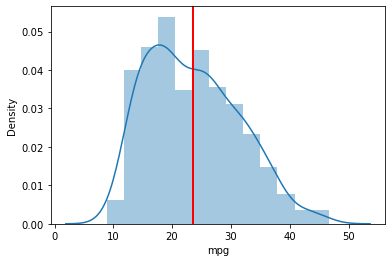

In [5]:
mpg_mean = data['mpg'].mean()
g = sns.distplot(data['mpg'])
g.axvline(mpg_mean , color = 'red', linewidth = 2);

##### Most cars moves nearly 23 miles per galon

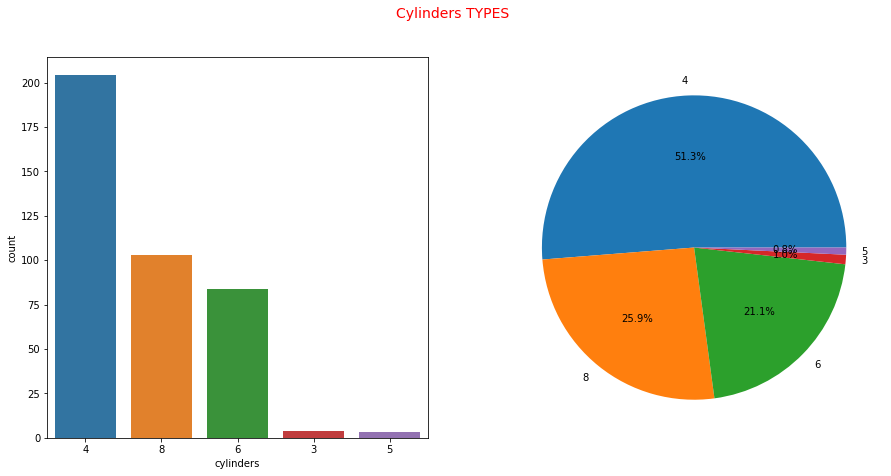

In [6]:
fig , axis = plt.subplots(1,2,figsize=(15,7))

cylinders_order = data['cylinders'].value_counts().index
cylinders_value = data['cylinders'].value_counts().values

sns.countplot(data = data , x = 'cylinders' ,order = cylinders_order , ax = axis [0])
plt.pie(cylinders_value  ,labels = cylinders_order,startangle=0 , autopct = '%1.1f%%' ) 
plt.suptitle("Cylinders TYPES" , color = 'r' , size = 14);

In [7]:
data['displacement'].describe()

count    398.000000
mean     193.425879
std      104.269838
min       68.000000
25%      104.250000
50%      148.500000
75%      262.000000
max      455.000000
Name: displacement, dtype: float64

C:\Users\Ghazy\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


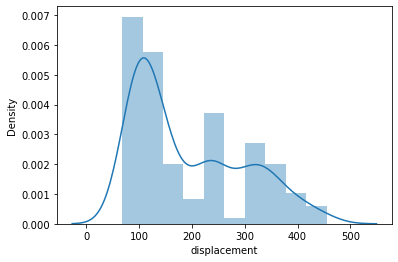

In [8]:
sns.distplot(data['displacement']);

Text(0.5, 0.98, 'Model year')

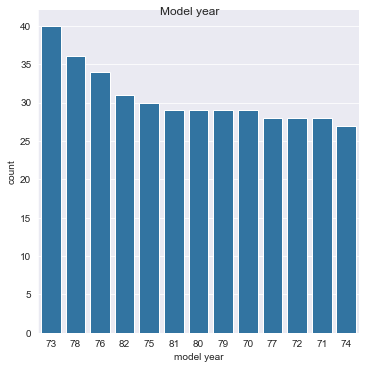

In [9]:
sns.set_style("darkgrid")
model_year_index = data['model year'].value_counts().index
base_color = sns.color_palette()[0]
sns.catplot(x = 'model year' , data = data, kind = 'count' , order = model_year_index , color= base_color)
plt.suptitle("Model year")

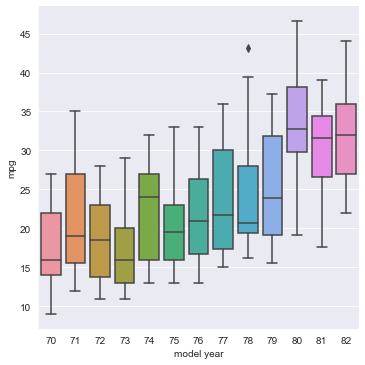

In [10]:
sns.catplot(x = "model year" , y= "mpg" , data = data ,kind = 'box');

##### As the model year increase the mpg increases in the car

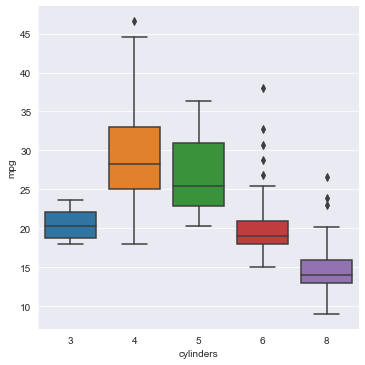

In [11]:
sns.catplot(x = "cylinders" , y= "mpg" , data = data ,kind = 'box');

##### 4 cylinders type is the most one saving galons

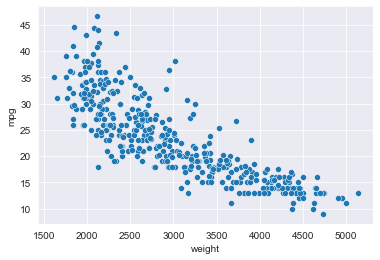

In [12]:
sns.scatterplot(x= "weight" , y = 'mpg',data = data );

##### From plot we realize that there is an inversly relationship between weight and mpg

## Is there a relation between acceleration and displacement with mpg?🤔

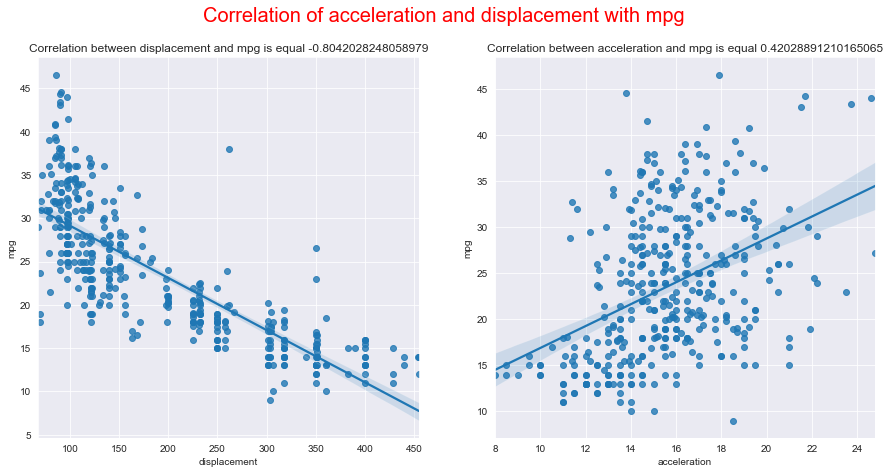

In [13]:
fig , axis = plt.subplots(1,2,figsize=(15,7))
sns.regplot(x = "displacement" , y = "mpg" , data = data , ax = axis[0])
sns.regplot(x = "acceleration" , y = 'mpg' , data = data , ax = axis[1])
corr_displacement_mpg = data["displacement"].corr(data['mpg'])
corr_acceleration_mpg = data["acceleration"].corr(data['mpg'])
axis[0].set_title("Correlation between displacement and mpg is equal {}".format(corr_displacement_mpg) ,size = 12 )
axis[1].set_title("Correlation between acceleration and mpg is equal {}".format(corr_acceleration_mpg) ,size = 12 )
plt.suptitle("Correlation of acceleration and displacement with mpg" , size = 20 , color = "red");

##### There is a strong inversly correlation between displacement and mpg
##### While there is a weak correlation between acceleration and mpg